# Node2vec for network analysis

One of the hottest topic of research in deep learning is graph neural networks. The last few years saw the number of publications and libraries to analyse data have grown consistently. One of the first models to show a
considerable improvement on the tasks of node classification and link prediction is *Node2vec*. The paper by researchers at Stanford addressed one of the complexities of working with graph data; the irregularity of the data structured. While images can be represented as are grids of pixels and text can be represented as sequences of symbols, it is not as simple when it comes to graphs. Graphs do not have fixed node ordering or reference point, there is also a wide variation in the structure of the graphs e.g. one node can be connected to 100 nodes while another one may only have one connection. The authors also point to the limitations of more traditional techniques such as dimensionality reduction since they scale poorly to large networks and the resulting representations perform poorly in downstram tasks. See this really great explanation by [Jure Leskovec](http://web.stanford.edu/class/cs224w/slides/07-noderepr.pdf) one of the authors of node2vec. 

The idea behind node2vec is to generate embeddings of the nodes for using in downstream tasks. The authors avoid some of the difficulties in processing network data by creating random walks the nodes in the graph and using the information about the sequence of nodes traversed as the input data for the embedding algorithm, in this case the *skipgram* model of *word2vec*. Besides the idea of using embeddings to represent the data the model introduces *biased random walks*. The biased random walks and its parameters *p* and *q* allow the random walk to implement different exploration strategies. The return parameter *p* controls the likelihood of inmediately traveling back to a node recently traversed, and as such it can favor a breadth first search (BFS) where we explore local neighborhoods and find embeddings that better capture structural equivalence. The in-out parameter *q* controls the likelihood of walking away from the previous parameter and as such can favor a depth first search (DFS) which in turn produces embeddings that better capture homophily. To put it simply the authors generate random walks for each node to serve as sentences, and then use those sentences as a input for a shallow embedding model. 

The dataset that I will use to test the model is the bike trip data from [Capitol Bike Share](). The data comprises several million trips made between 2010 and 2020. I processed every trip as an adjacency list where the weights correspond to the number of trips made between each pair of nodes. The file to create the data can be found [here](https://github.com/jlealtru/website_tutorials/blob/main/notebooks/%20processing_capital_bikeshare_data.ipynb). To implement the node2vec algorithm I am using the really interesting library [stellargraph](https://github.com/stellargraph/stellargraph). 

-do basic betweeness
-do indegree
-do outdegree

In [24]:
import pandas as pd
import networkx as nx
from gensim.models import Word2Vec
import stellargraph as sg
from stellargraph.data import BiasedRandomWalk
import os
import zipfile
import numpy as np
import matplotlib as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import igraph as ig
%matplotlib inline

# ideas







In [2]:
graph_data = pd.read_csv('../data/capital_bikes/graph_data_full.csv')

In [4]:
graph_bikes = sg.StellarDiGraph(edges=graph_data)

In [6]:
graph_bikes.info()

'StellarDiGraph: Directed multigraph\n Nodes: 708, Edges: 150527\n\n Node types:\n  default: [708]\n    Features: none\n    Edge types: default-default->default\n\n Edge types:\n    default-default->default: [150527]\n        Weights: range=[1, 42863], mean=175.382, std=688.561\n        Features: none'

In [12]:
rw = BiasedRandomWalk(graph_bikes, p = 1, q = 0.5, n = 10, length = 80, 
                      seed=42, weighted = True)

In [13]:
walks = rw.run(nodes=list(graph_bikes.nodes())
               # root nodes
              )
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 7080


In [14]:
str_walks = [[str(n) for n in walk] for walk in walks]

In [15]:
str_walks

[['10th & E St NW',
  '8th & D St NW',
  '3rd & D St SE',
  '8th & East Capitol St NE',
  '4th & C St SW',
  'Columbus Circle / Union Station',
  '11th & H St NE',
  'D St & Maryland Ave NE',
  'Eastern Market Metro / Pennsylvania Ave & 7th St SE',
  '15th St & Massachusetts Ave SE',
  'Potomac & Pennsylvania Ave SE',
  'Eastern Market / 7th & North Carolina Ave SE',
  '13th & D St NE',
  'North Capitol St & F St NW',
  '10th & K St NW',
  'New York Ave & 15th St NW',
  '7th & T St NW',
  '15th & P St NW',
  '5th St & Massachusetts Ave NW',
  '10th St & Constitution Ave NW',
  '10th & G St NW',
  'Massachusetts Ave & Dupont Circle NW',
  '8th & H St NW',
  '1st & Rhode Island Ave NW',
  'Rhode Island & Connecticut Ave NW',
  'Adams Mill & Columbia Rd NW',
  'Calvert St & Woodley Pl NW',
  '18th St & Wyoming Ave NW',
  '15th & P St NW',
  'New York Ave & 15th St NW',
  '11th & F St NW',
  'Convention Center / 7th & M St NW',
  '17th & Corcoran St NW',
  'New Hampshire Ave & T St NW',
  

In [16]:
len(str_walks[20])

80

In [19]:
model = Word2Vec(str_walks, size=80, window=10, min_count=1, sg=1, workers=4, iter=20)
#model.wv.most_similar('Lincoln Memorial')

In [21]:
model.wv.most_similar('Fort Totten Metro')

[('3rd St & Riggs Rd NE', 0.8534982800483704),
 ('New Hampshire & Gallatin St NW', 0.8124732971191406),
 ('Chillum Rd & Riggs Rd / Riggs Plaza', 0.7413241863250732),
 ('5th & Kennedy St NW', 0.6861050128936768),
 ('Riggs Rd & East West Hwy', 0.6371341347694397),
 ('New Hampshire Ave & East-West Hwy', 0.6118998527526855),
 ('Takoma Park Rec Center', 0.6036407947540283),
 ('New Hampshire & Kirklynn Ave', 0.5711868405342102),
 ('Georgia Ave & Kennedy St NW', 0.5710887908935547),
 ('White Oak Rec Center', 0.5636956095695496)]

In [94]:
# add tsne visualization and network visualization
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality

In [95]:
transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

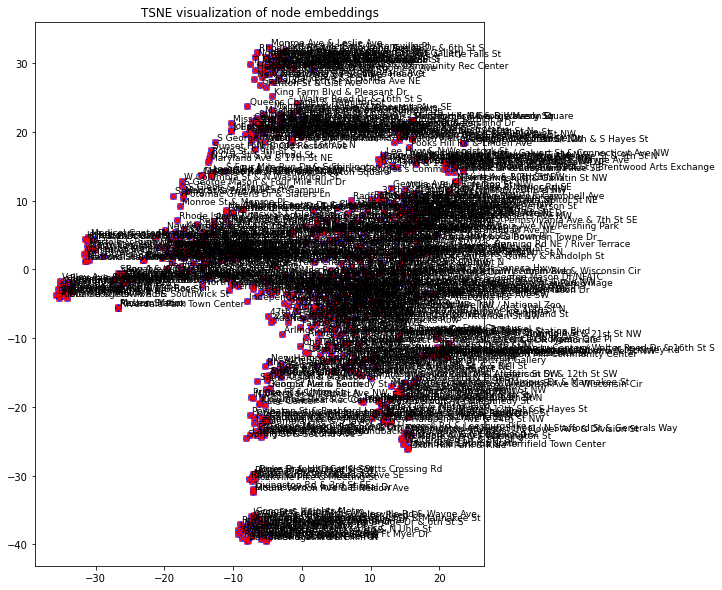

In [116]:
# draw the embedding points, coloring them by the target label (paper subject)
import pylab as pl

alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_ids))}

#replace with indegree
#node_colours = [label_map[target] for target in node_targets]
plt.figure(figsize=(10, 10))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c='blue',
    cmap="jet",
    alpha=alpha,
)

for i,type in enumerate(label_map):
    x = node_embeddings_2d[i, 0]
    y = node_embeddings_2d[i, 1]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()